In [1]:
import json
import torch
from torchvision.transforms.functional import to_pil_image


import remote_sensing_ddpm.evaluation.baselines.ddpm_cd as Model
import remote_sensing_ddpm.evaluation.baselines.ddpm_cd.data as Data
from remote_sensing_ddpm.datasets.uc_merced_land_use.uc_merced_dataset import UCMerced

In [2]:
class NoneDict(dict):
    def __getitem__(self, key):
        return dict.get(self, key)

with open(
    "/Users/alexanderlontke/Documents/Uni/St. Gallen/SS_23/master_thesis/remote-sensing-ddpm/config/baselines/ddpm-cd/classification_local.json",
    "rb",
) as config_file:
    opt = NoneDict(json.load(config_file))

In [3]:
diffusion = Model.create_model(opt)
# Set noise schedule for the diffusion model
diffusion.set_new_noise_schedule(
    opt["model"]["beta_schedule"][opt["phase"]], schedule_phase=opt["phase"]
)

In [4]:
dataset = UCMerced(
    data_root=opt["datasets"]["train"]["data_root"],
    phase="train",
    split_ratios={"train": 1.0}
)
data_loader = Data.create_cd_dataloader(
    dataset=dataset,
    dataset_opt=opt["datasets"]["train"],
    phase="train",
)

Loading Classes:: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]


In [5]:
_, first_batch = enumerate(data_loader).__next__()

In [6]:
diffusion.feed_data(data=first_batch)
_, fd = diffusion.get_single_representation(
    t=100,
)

In [8]:
from remote_sensing_ddpm.evaluation.baselines.ddpm_cd.misc.print_diffuse_feats import print_feats

for level in range(0, len(fd)):
    print_feats(
        opt=opt,
        train_data=first_batch,
        feats_A=fd,
        feats_B=None,
        level=level,
        t=100,
    )

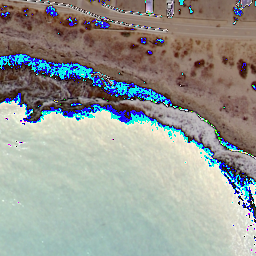

In [9]:
to_pil_image(first_batch["image"][0], mode="RGB")

In [10]:
to_pil_image(fd[0][0], mode="RGB")

ValueError: pic should not have > 4 channels. Got 128 channels.

## Check UC Merced dataset class ##

In [ ]:
from PIL import Image
sample_image_path ="/Users/alexanderlontke/Documents/Uni/St. Gallen/SS_23/master_thesis/data/UCMerced_LandUse/Images/harbor/harbor00.tif"
img = Image.open(sample_image_path).convert("RGB")

In [ ]:
img

In [ ]:
from remote_sensing_ddpm.evaluation.baselines.ddpm_cd.data.util import (
    transform_augment,
)
t_img = transform_augment(
    img=img,
    min_max=(-1, 1)
)
tt_img = to_pil_image(t_img, "RGB")

In [ ]:
tt_img